                B&H  1x_short  1x_no_short  2x_short  2x_no_short  action
date                                                                     
2021-12-02  0.97661  0.616193     0.775465  0.378723     0.589341     1.0


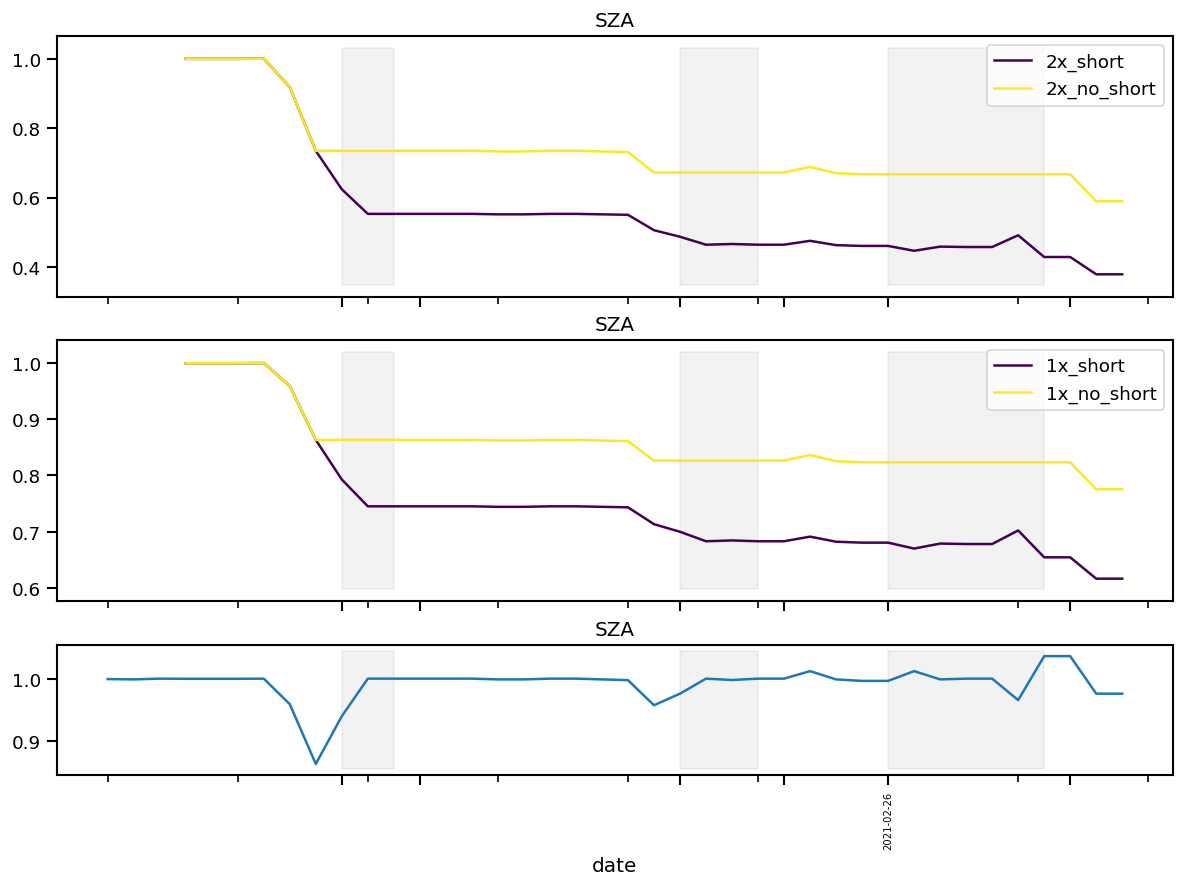

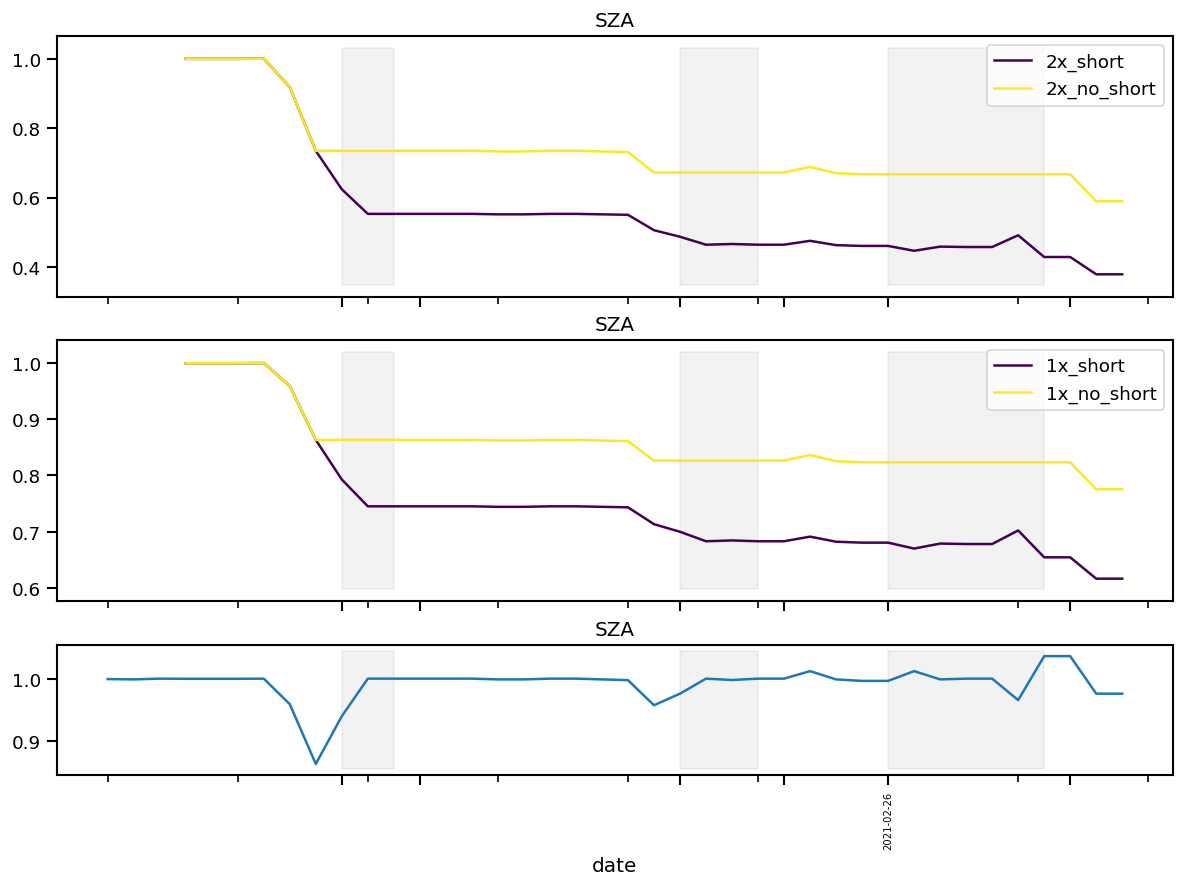

In [157]:
from evaluate import Evaluator
import pandas as pd

df_label=pd.read_csv('./Data/rolling_mlp/SHEA_pred.csv') 
df_label.columns=df_label.columns.str.lower()
df_label.set_index('date',inplace=True,drop=True)
df_label.index.name='date'
df_label.dropna(inplace=True)


hbea=df_label.loc[:,['close','reward']]
hbea['reward_diff']=hbea.reward.diff()
hbea['reward_diff_1']=hbea.reward.diff().shift(-1)
hbea['reward_diff'].fillna(0,inplace=True)
hbea['reward_diff_1'].fillna(0,inplace=True)
hbea['action']=0
hbea.loc[(hbea['reward_diff']>=0) & (hbea['reward']<0.5) & (hbea['reward_diff_1']>=0),'action']=-1
hbea.loc[(hbea['reward_diff']>=0) & (hbea['reward']<0.5) & (hbea['reward_diff_1']<=0),'action']=-1
hbea.loc[(hbea['reward_diff']<=0) & (hbea['reward']>0.5) & (hbea['reward_diff_1']>=0),'action']=1
hbea.loc[(hbea['reward_diff']<=0) & (hbea['reward']>0.5) & (hbea['reward_diff_1']<=0),'action']=1
hbea.dropna(inplace=True)
hbea=hbea[['close','action']][-100:-60]
ev = Evaluator(hbea)
ev.plot(title ="SZA")
#ev.short_days()